# Probability Theory

In [1]:
%matplotlib inline
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## <span style="color:Orange">Introduction</span>

Probability theory is a mathematical language for reasoning about uncertain outcomes. Possible sources of uncertainty include:
 - Inherent randomness in a physical process, e.g., arising from [quantum phenomena](http://algassert.com/quirk#circuit={"cols":[]}) or a noisy measurement process.

 - Incomplete information, e.g., due to a measurement that only observes the partial state of a system or a model that only represents partial state.
 

Probability theory enables us to build quantitative models that describe our data, both seen and not yet seen, so plays an important role in machine learning. A precise formulation is very technical since it must deal with edge cases that we never encounter in practical work. We will skip over most of the technical details here while still introducing the main concepts that are useful to understand the interpretation of measurements.

## <span style="color:Orange">Axioms of Probability</span>

There are different (equally valid) approaches to formulating a theory of probability. Here we follow the approach of Kolmogorov based on set theory, which has three ingredients:
 1. A <span style="color:violet">sample space</span> $\Omega$ that defines the set of all possible uncertain outcomes.

 2. An <span style="color:violet">event space</span> $\cal F$ of combinations of outcomes (subsets of $\Omega$).

 3. A <span style="color:violet">probability measure</span> $P: {\cal F}\rightarrow [0,1]$ that assigns numerical probabilities to each event.
 
The tuple $(\Omega, {\cal F}, P)$ is a <span style="color:violet">probability space</span>.

<hr style="border:1px solid rgba(255, 255, 255, 1); margin: 2em 0;">

___<span style="color:violet">EXAMPLE</span>:___ Consider an electron with the following **<span style="color:LightGreen">probability space</span>**:
 1. We are interested in a single electron that we can only observe via its spin. Therefore the **<span style="color:LightGreen">sample space</span>** consists of its two possible spins: $\uparrow$ and $\downarrow$.

 2. Our **<span style="color:LightGreen">event space</span>** consists of all subsets of the sample space: { }, {$\uparrow$}, {$\downarrow$}, {$\uparrow, \downarrow$}.

 3. Our **<span style="color:LightGreen">probability measure</span>** assigns the probabilities: $P(\{\,\}) = 0$, $P(\{\uparrow\}) = P(\{\downarrow\}) = 0.5$, $P(\{\uparrow, \downarrow\}) = 1$.

<hr style="border:1px solid rgba(255, 255, 255, 1); margin: 2em 0;">

A **<span style="color:Violet">probability space</span>** defines an uncertain process that you can think of as a black box that generate outcomes $\omega_1, \omega_2, \ldots \in \Omega$. After each outcome $\omega_i$, all events containing $\omega_i$ are said to have **occurred** (so, in general, multiple events occur simultaneously).  Events $A, B, \ldots$ occur with probabilities $P(A), P(B), \ldots$, so the probability measure $P$ encodes the dynamics of the uncertain process.

Recall the basic operations of set theory that we will use frequently below. The box represents the set of all possible outcomes, $\Omega$, with individual outcomes $\omega$ indicated with dots. The labels show some possible subsets within the event space, constructed using the union ($\cup$), intersection ($\cap$) and complement ($\setminus$) operations (in logic, _union_ and _intersection_ are called OR and AND, respectively, and the _complement_ can be thought of as the NOT IN operation):

<div>
<img src="https://raw.githubusercontent.com/illinois-mlp/MachineLearningForPhysics/main/img/ProbabilityTheory-SetOperations.png" width=800></img>
</div>

Should the sample space for a coin toss include the possibility of the coin landing on its edge?  It is up to you.

The choice of **<span style="color:Violet">event space</span>** is more constrained since it must satisfy the following conditions:
 - <span style="color:violet">R1</span>: If event $A$ is included, then so is its complement $\Omega \setminus A$. 

 - <span style="color:violet">R2</span>: If events $A_1$ and $A_2$ are included, then so is their union $A_1 \cup A_2$.  

If you start with the events you care about and then repeatedly apply the rules above, you will automatically satisfy the additional conditions that:
 - The "everything" event $A = \Omega$ is included (as the union of all other subset events).

 - The "nothing" event $A = \{\}$ is included (as the complement of the "everything" event).
 
The set of all possible subsets of $\Omega$ is always a valid event space, but other (simpler) choices are possible when you don't care about some subsets (or don't know how to assign probabilities to them).

<hr style="border:1px solid rgba(255, 255, 255, 1); margin: 2em 0;">

___<span style="color:violet">EXERCISE</span>:___ Use the rules above to create the smallest possible event space containing {a} for a sample space consisting of the four possible outcomes {a,b,c,d}.

One way to apply the rules is:
 - R1: $\{a\} \Rightarrow \{b,c,d\}$
 
 - R2: $\{a\}, \{b,c,d\} \Rightarrow \{a,b,c,d\}$
 
 - R1: $\{a,b,c,d\} \Rightarrow \{\}$

The complete event space is then: $\{\}, \{a\}, \{b,c,d\}, \{a,b,c,d\}.$

<hr style="border:1px solid rgba(255, 255, 255, 1); margin: 2em 0;">

___<span style="color:violet">EXERCISE</span>___: Use the rules above to create the smallest possible event space containing $\{a\}$ and $\{b\}$ for the same sample space.

One way to apply the rules is:
 - R1: $\{a\} \Rightarrow \{b,c,d\}$

 - R1: $\{b\} \Rightarrow \{a,c,d\}$

 - R2: $\{a\}, \{b\} \Rightarrow \{a,b\}$

 - R1: $\{a,b\} \Rightarrow \{c,d\}$

 - R2: $\{a,b\}, \{c,d\} \Rightarrow \{a,b,c,d\}$

 - R1: $\{a,b,c,d\} \Rightarrow \{\}$
 
The complete event space is then: $\{\}, \{a\}, \{b\}, \{a,b\}, \{c,d\}, \{b,c,d\}, \{a,c,d\}, \{a,b,c,d\}$.

Note that both of these examples allow us to reason about the probabilities of some outcomes without ever needing specify the probabilities of other outcomes. This only makes sense if we assume that $P(\Omega) = 1$, which is one of the Kolmogorov axioms described below.

<hr style="border:1px solid rgba(255, 255, 255, 1); margin: 2em 0;">

Once you have specified your sample and event spaces, you are ready to assign probabilities to each event. This where you make quantitative statements that define how your probability universe works. In the example above we set $P(\{\uparrow\}) = P(\{\downarrow\}) = 0.5$, but you could equally well define an alternate reality where $P(\{\uparrow\}) = 0.2$ and $P(\{\downarrow\}) = 0.8$.

The <span style="color:violet">Kolmogorov axioms</span> are that:
 - For any event $A$, $\Large P(A) \ge 0$.

 - $\Large P(\Omega) = 1$ (the "everything" event).

 - If events $A_1, A_2, \ldots$ have no outcomes in common (i.e., they are *disjoint* $A_i \cap A_j = \{\}$), then:

$$ \Large
P(A_1 \cup A_2 \cup \ldots) = P(A_1) + P(A_2) + \ldots \; .
$$

<hr style="border:1px solid rgba(255, 255, 255, 1); margin: 2em 0;">

___<span style="color:violet">DISCUSS___: How might you formulate a probability space for an electron whose spin is time dependent, e.g., because it is in an energy eigenstate that mixes the two spin states.

We first need to define all possible outcomes.  Since outcomes are the results of measurements, we need to specify when measurements are performed and whether multiple measurements might be performed on the same electron.

Suppose measurements are always made at a fixed time $t_1$ and time $t_2 > t_1$, then there are four possible outcomes: $(\uparrow,\uparrow), (\uparrow,\downarrow), (\downarrow,\uparrow), (\downarrow,\downarrow)$. Next, build an event space containing the outcomes you care about (as in the exercises above). Finally, assign each event's probability using quantum mechanics.

This construction could be easily generalized to more measurements at predetermined times, but if measurements are allowed at arbitrary times we need a different approach.  In the most general case, the possible measurements are specified by a sequence of $M$ increasing times $0 \le t_1 \le t_2 \le \ldots \le t_M$, where $M = 1, 2, 3, \ldots$. This leads to an infinite (but enumerable) set of resulting possible outcomes.  However, we could still chose a relatively simple event space, for example:
 - a: nothing event

 - b: at least one measurement before $t = 1\,\mu\text{sec}$

 - c: no measurements before $t = 1\,\mu\text{sec}$

 - d: everything event.

<hr style="border:1px solid rgba(255, 255, 255, 1); margin: 2em 0;">

The three axioms above are sufficient to derive many useful properties of a probability measure $P$, including ($\subseteq$ means "subset"):

 1. $\Large P(A) + P(\Omega\setminus A) = 1$

 2. $\Large A\subseteq B \implies P(A) \le P(B)$

 3. $\Large P(A\cap B) \le \min(P(A), P(B))$

 4. $\Large P(A\cup B) = P(A) + P(B) - P(A\cap B)$
 
These all make sense when translated into corresponding Venn diagrams (try it, to convince yourself). The last property is useful for replacing the probability of **<span style="color:LightGreen">A or B</span>** with the probability of **<span style="color:LightGreen">A and B</span>** in an expression (or vice versa).

We have already seen one special case of the third property above ("disjoint" means non-overlapping):

$$ \Large
\text{When } A, B\ \text{are disjoint}\,\Rightarrow P(A\cap B) = 0 \; .
$$

Another important special case is:

$$ \Large
P(A\cap B) = P(A) P(B) \; .
$$

In this case, we say the events $A$ and $B$ are **<span style="color:LightGreen">independent</span>**. 

## <span style="color:Orange">Disjoint vs. Independence</span>

By independence (considering events A and B), we mean that an occurance of A does not depend on the occurance of B

By disjoint of two events we mean that whatever is happening in A cannot happen in B.

<hr style="border:1px solid rgba(255, 255, 255, 1); margin: 2em 0;">

___<span style="color:violet">EXAMPLE___: Lets say that you are tossing a dice twice. In the first trial, possible outcomes are either faces with numbers 1,2,3,4,5,6. Let us consider  probability of coming a even number(A) and odd number(B). Now if the outcome is an even number (A), then it can not be an odd number(B) i.e. whatever happens in A can not happen in B. So A and B are disjoint. 

Now consider occurrence of no 6 (A) in first toss and the result (B) of the second trial. Getting 6 in second trial does not depend upon whether or not we got a 6 on the first trial. i.e. we say B is independent of A.

<hr style="border:1px solid rgba(255, 255, 255, 1); margin: 2em 0;">

In the following we will introduce several new concepts related to probability, but keep in mind that probability is only defined on subsets of outcomes (events), so any new concept must translate to a statement about events.

## <span style="color:Orange">Conditional Probability and Bayes' Rule</span>

The probability of event $A$ **given that $B$ has occurred**, written $P(A\mid B)$, is a central concept in machine learning but does not appear above. Since $P$ is only defined for events, and $A\mid B$ is not an event, the notation does not even make sense!  Instead, it is shorthand for this ratio of valid probabilities:

$$ \Large
\boxed{
P(A\mid B) \equiv \frac{P(A\cap B)}{P(B)}} \;.
$$

This definition requires that $P(B) > 0$, which is not true for all events $B$, but then necessarily has a value between zero and one (draw a Venn diagram to convince yourself), so makes sense to describe as a **<span style="color:LightGreen">probability</span>**. 

Note that we are introducing conditional probability as a *definition*, not a result of some calculation, but there are other ways to formulate probability theory in which $P(A\mid B)$ is included in the initial axioms.

$\to$ **A <span style="color:LightGreen">conditional probability</span> effectively shrinks the sample space $\Omega$ to the outcomes in $B$, resulting in a new probability space with renormalized probabilities.**

<hr style="border:1px solid rgba(255, 255, 255, 1); margin: 2em 0;">

___<span style="color:violet">EXERCISE</span>:___ Study this [visualization](https://setosa.io/conditional/) of conditional probability.
1. What is the full sample space of outcomes $\Omega$?

2. Explain how the horizontal bars represent events. Are they are complete event space?

3. Explain how the colors of the balls represent event probabilities or conditional probabilities.

Answers:
 1. The full sample space consists of all possible horizontal positions for a single ball. (We could also define a multi-ball sample space, but that's not what this visualization is intended for).

 2. Each horizontal bar represents a set of outcomes where the horizontal position lies in some interval. The  events shown are not a complete event space since, for example, they are missing the "nothing" and "everything" events.

 3. With the "world" button selected, the histogram shows event probabilities. With any other button select, the  conditional probabilities are shown.

<hr style="border:1px solid rgba(255, 255, 255, 1); margin: 2em 0;">

When $A$ and $B$ are independent events, the conditional probability ratio simplifies to:

$$ \Large
\text{When } A, B\,\text{ are independent}\implies P(A\mid B) = P(A)
$$

If we compare $P(A\mid B)$ and $P(B\mid A)$ we find that:

$$ \Large
\boxed{
P(A\mid B) = P(B\mid A) \frac{P(A)}{P(B)}
}
$$

If $P(A) \ll P(B)$, then $P(A\mid B) \ll P(B\mid A)$. However, there is a [natural tendency](https://en.wikipedia.org/wiki/Confusion_of_the_inverse) to assume that $P(A\mid B) \simeq P(B\mid A)$ in informal reasoning, so be careful!

This relationship between $P(A\mid B)$ and $P(B\mid A)$ is known as **<span style="color:LightGreen">Bayes' rule</span>** or **<span style="color:LightGreen">Bayes' Theorem</span>**. Although there is some controversy and debate surrounding *Bayesian statistics*, Bayes' rule follows directly from the definition of conditional probability and is firmly established.  (The Bayesian controversy, which we will discuss later, is over what constitutes a valid $A$ or $B$).

If $A_1...A_N$ are exclusive and exhaustive (meaning that each event must belong to one and only one $A_i$, then we can write **<span style="color:LightGreen">Bayes' Theorem</span>** as 

$$ \Large
\boxed{
P(A\mid B) \equiv \frac{P(A\cap B)}{\Sigma_{i}P(B|A_i)P(A_i)}}
$$

<hr style="border:1px solid rgba(255, 255, 255, 1); margin: 2em 0;">

___<span style="color:violet">EXAMPLE</span>___: We have a disease that is carried by fraction $X$ of the population: 

$$ \Large
P(\text{disease}) = X ~~~~~~~~~~~~~ P(\text{no disease}) = 1 - X
$$

where $X=1$%.

You make a test for the disease and it yields a positive result fraction $Y$ of the time when a person has the disease: 

$$ \Large
P(+|\text{disease}) = Y ~~~~~~~~~~~~~ P(-|\text{disease}) = 1 - Y
$$

where $Y = 99$%.

Since $Y$ is pretty big, you feel pretty good!

However, your test has a false positive fraction of $Z = 4$%. Since $Z$ is small so you feel OK about the test. Just to be clear:

$$ \Large
P(+|\text{no disease}) = Z ~~~~~~~~~~~~~ P(-|\text{no disease}) = 1 - Z
$$

*So the question is if a person gets a positive test result, what are the chances they have the disease?*

In [2]:
# Example numbers
X = 0.01 # P(disease) rare disease
Y = 0.99 # P(+|disease) excellent test
Z = 0.04 # P(+|no disease) modest false positive result

# using the summed form of Bayes' Theorem above
val = Y * X / ((Y * X) + (Z*(1-X))) # val = P(disease|+)
print(val)

0.2


<hr style="border:1px solid rgba(255, 255, 255, 1); margin: 2em 0;">

## <span style="color:Orange">Random Variables</span>

A probability space connects sets of possible outcomes with numerical probabilities, but we also need a way to characterize the outcomes themselves numerically.  **<span style="color:LightGreen">Random variables** fill this gap.

A **<span style="color:LightGreen">random variable</span>** $X: \Omega\rightarrow\mathbb{R}$ labels each possible outcome $\omega\in\Omega$ with a real number $x = X(\omega)$.  The probability $P(x)$ of a specific random variable value $x$ is then *defined* to be:

$$ \Large
\boxed{
P(X=x) \equiv P\left(\{ \omega: X(\omega) = x \}\right)} \; .
$$

We often write $P(x)$ as shorthand for $P(X=x)$.  Note that, as with $P(A|B)$ earlier, this is a *definition*, not a result, which translates a new notation into a probability assigned to an event.

*Technical points:*
 - *We are assuming that $X$ varies continuously, since that is the most common case in scientific data. Random variables can also be discrete, leading to a set of parallel definitions but with some different notation.*

 - *$P$ is only defined for events, but what if the set $\{ \omega: X(\omega) = x \}$ is not in the event space? There are some restrictions on $X(\omega)$ that prevent this happening.*

**<span style="color:Violet">DISCUSS</span>:** Try this [visual demonstration](https://seeing-theory.brown.edu/probability-distributions/index.html#section1) of how a random variable is simply an arbitrary labeling of possible outcomes
 

We can generalize the equality condition above, $X(\omega) = x$, to any well-defined condition, for example:

$$ \Large
P(a\le X \le b) \equiv P\left(\{ \omega: a \le X(\omega) \le b \}\right) \; .
$$

The result will always be in the interval $[0,1]$ because it reduces to the probability assigned to some event.

## <span style="color:Orange">Cumulative Distribution Function</span>

One particularly useful condition yields the **<span style="color:LightGreen">cumulative distribution function</span> (CDF)**:

$$ \Large
F_X(x) \equiv P\left(\{ \omega: X(\omega) \le x\} \right) \; .
$$

The CDF always rises monotonically from 0 to 1 and is always well defined.

## <span style="color:Orange">Probability Density Function</span>

When the CDF is differentiable everywhere, we can also calculate the **<span style="color:LightGreen">probability density function</span> (PDF)**:

$$ \Large
f_X(x) \equiv \frac{d}{dx} F_X(x) \; .
$$

Note that, while CDF is a true probability and always in $[0,1]$, this is not true of the PDF, for which we can only say that PDF $\ge 0$. Also, the PDF will, in general, have dimensions introduced by the derivative.

A PDF is a *density* in the sense that:

$$ \Large
\boxed{
P\left(\{\omega: x \le X \le x + \Delta x\}\right) \simeq f_X(x)\, \Delta x}
$$

with 

$$\Large 
f_X(x) \Delta x \text{ in } [0,1]
$$

since the LHS is the probability of a single event. (We will use this result several times below.)

We can recover the CDF from a PDF with integration,

$$ \Large
F_X(x) = \int_{-\infty}^x\, f_X(x') dx' \; ,
$$

or, in equivalent set theory notation,

$$ \Large
\begin{aligned}
F_X(x) &= \lim_{\Delta x\rightarrow 0}\, \sum_i f_X(x_i)\,\Delta x \\
&= \lim_{\Delta x\rightarrow 0}\, \sum_i P\left(
\{\omega: x_i \le X(\omega) \le x_i + \Delta x\} \right) \\
&= \lim_{\Delta x\rightarrow 0}\, P\left(
\cup_i \{\omega: x_i \le X(\omega) \le x_i + \Delta x\} \right) \; .
\end{aligned}
$$

where the last line uses the fact that the sets $\{\omega: x_i \le X(\omega) \le x_i + \Delta x\}$ are all disjoint and combine to cover the full sample space $\Omega$.

Random variables are conventionally denoted with capital letters near the end of the alphabet. We have already used $X$ and $Y$ to denote arrays of data samples or latent variables, but that was no accident.

Think of a dataset $X$ as a sequence of random outcomes $\omega_i$ in the "universe" mapped via a random variable $X_j(\omega)$ for each feature. The elements $X_{ij}$ of the dataset are then just $X_j(\omega_i)$. Similarly, when you perform dimensionality reduction $X\rightarrow Y$, you are effectively adopting new random variables $Y_j(\omega_i)$.

The following code blocks will plots the PDF and CDF for a Guassian (normal) distribution.  This uses the scipy library.  Use the scipy documentation to figure out how to change the location and the width of the Guassian.

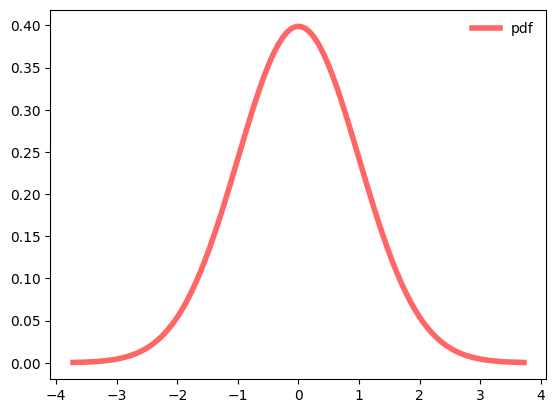

In [3]:
rv = norm()
fig, ax = plt.subplots(1, 1)
x = np.linspace(rv.ppf(0.0001),  rv.ppf(0.9999), 100)

ax.plot(x, rv.pdf(x),

       'r-', lw=4, alpha=0.6, label='pdf')
ax.legend(loc='best', frameon=False)

plt.show()

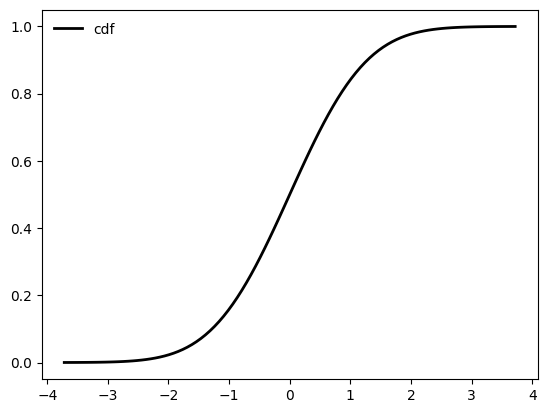

In [4]:
fig, ay = plt.subplots(1, 1)
ay.plot(x, rv.cdf(x), 'k-', lw=2, label='cdf')
ay.legend(loc='best', frameon=False)

plt.show()

## <span style="color:Orange">Sampling a Probability Density</span>

Your measurement samples the underlying PDF.  With a single measurement, you know very little about the PDF; as the number of measurements increases, you can better see the PDF.

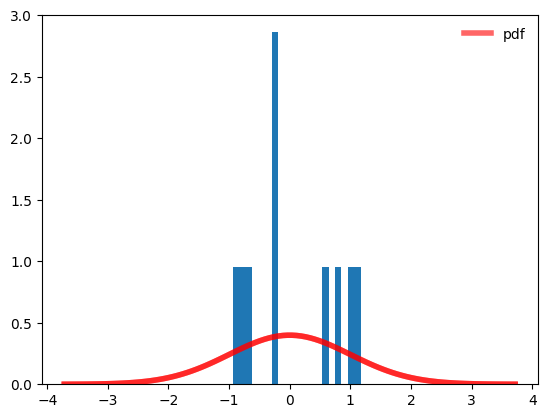

In [5]:
rv1 = norm()
c = norm.rvs(size=10) #size is the number of random values
fig, az = plt.subplots(1, 1)
x = np.linspace(rv1.ppf(0.0001),

                rv1.ppf(0.9999), 100)

az.plot(x, rv1.pdf(x),

       'r-', lw=4, alpha=0.6, label='pdf')
az.legend(loc='best', frameon=False)
plt.hist(c,bins=20, density=True) #density normalizes the histogram to have unit area (like the pdf itself)
az.plot(x, rv1.pdf(x),

       'r-', lw=4, alpha=0.6, label='pdf')

plt.show()

## <span style="color:Orange">Joint, Marginal and Conditional Probability Density</span>

When data is described by multiple random variables (features), $x_0, x_1, \ldots$, it has a **<span style="color:violet">joint CDF</span>**:

$$ \Large
F_{X_0,X_1,\ldots}(x_0, x_1, \ldots) \equiv P\left(
\{\omega: X_0(\omega) \le x_0\} \cap \{\omega: X_1(\omega) \le x_1\} \cap \ldots \right) \; .
$$

Note how each random variable translates to a set of outcomes in the same underlying sample space $\Omega$, whose intersection specifies a single event from ${\cal F}$.

In the following, we will restrict to the 2D case $F(x,y)$ and drop the subscript on $F$, to simplify the notation, but you can replace $x = x_0$ and $y = x_1, x_2, \ldots$ throughout.

The **<span style="color:violet">joint PDF</span>** corresponding to a joint CDF is:

$$ \Large
f(x, y) \equiv \frac{\partial}{\partial x}\frac{\partial}{\partial y}\, F(x, y) \; .
$$

The total integral of the joint PDF is one,

$$ \Large
1 = \int dx dy \ldots f(x, y) \; ,
$$

but we can also integrate out a single random variable, yielding a **<span style="color:violet">marginal PDF</span>**, e.g.

$$ \Large
f(x) = \int dy\, f(x, y) \; .
$$

The set theory "proof" of this result is:

$$ \Large
\begin{aligned}
\int dy\, f(x, y)
&= \lim_{\Delta y\rightarrow 0}\, \sum_i\, f(x, y_i)\,\Delta y \\
&= \lim_{\Delta y\rightarrow 0}\, \sum_i \frac{\partial}{\partial x} P\left(
\{ \omega: X(x) \le x\} \cap \{ \omega: y_i \le Y(y) \le y_i + \Delta y\}\right)\\
&= \lim_{\Delta y\rightarrow 0}\, \frac{\partial}{\partial x} P\left( \bigcup_i
\{ \omega: X(x) \le x\} \cap \{ \omega: y_i \le Y(y) \le y_i + \Delta y\}\right)\\
&= \frac{\partial}{\partial x} P\left(\{ \omega: X(x) \le x\} \right) \\
&= f(x) \; ,
\end{aligned}
$$

where the fourth line follows from the third Kolmogorov axiom, since the sets $\{ \omega: y_i \le Y(y) \le y_i + \Delta y\}$ are all disjoint and combine to cover the full sample space $\Omega$.  In other words, **<span style="color:LightGreen">marginalizing out</span>** a random variable yields exactly the same joint probability we would have obtained if we had never introduced it in the first place.

Finally, a **<span style="color:violet">conditional PDF</span>** is defined in terms of the following conditional probability:

$$ \Large
f(x\mid y) \equiv \frac{\partial}{\partial x} \lim_{\Delta y\rightarrow 0}
P\left( \{\omega: X(\omega) \le x\} \mid \{\omega: y \le Y(\omega) \le y + \Delta y\}\right) \; .
$$

Using the definition of **<span style="color:LightGreen">conditional probability</span>** above, we find:

$$ \Large
\begin{aligned}
f(x\mid y) &= \lim_{\Delta y\rightarrow 0}\, \frac{\partial}{\partial x}
\frac{P\left( \{\omega: X(\omega) \le x\} \cap \{\omega: y \le Y(\omega) \le y + \Delta y\}\right)}
{P\left( \{\omega: y \le Y(\omega) \le y + \Delta y\}\right)} \\
&= \lim_{\Delta y\rightarrow 0}\, \frac{\partial}{\partial x}
\frac{\frac{\partial}{\partial y} P\left( \{\omega: X(\omega) \le x\} \cap
\{\omega: Y(\omega) \le y\} \right) \Delta y}
{\frac{\partial}{\partial y} P\left( \{\omega: Y(\omega) \le y\}\right) \Delta y} \\
&= \frac{\frac{\partial}{\partial x} \frac{\partial}{\partial y} P\left( \{\omega: X(\omega) \le x\} \cap
\{\omega: Y(\omega) \le y\} \right)}
{\frac{\partial}{\partial y} P\left( \{\omega: Y(\omega) \le y\}\right)} \\
&=\frac{f(x, y)}{f(y)} \; . 
\end{aligned}
$$

Rewritten in a slightly different form, this is also known as the "chain rule" of probability:

$$ \Large
f(x,y) = f(x\mid y)\, f(y) \; .
$$

Comparing $f(x\mid y)$ with $f(y\mid x)$ we derive the random-variable version of Bayes' rule,

$$ \Large
\boxed{
f(x\mid y) = \frac{f(y\mid x)\,f(x)}{f(y)} = \frac{f(y\mid x)\,f(x)}{\int dx\, f(x,y)} \; ,}
$$

where we have written out the conditional PDF $f(y)$ as an integral in the last expression.

**<span style="color:Violet">SUMMARY</span>:**
 - Commas signal a **joint** probability formed by set intersections (logical *AND*).

 - Missing random variables signal a **marginal** probability with the missing variables "integrated out".

 - A vertical bar $(\mid)$ signals a **conditional** probability with variables on the RHS fixed.
 
As always, a picture is worth a thousand words:

In [6]:
from scipy.integrate import simpson
from matplotlib.gridspec import GridSpec

def prob2d(cov1=0.):
    np.random.seed(0)
    mean, cov = [1, 2], [[1, cov1], [cov1, 1]] #means and covariance matrix
    z = np.random.multivariate_normal(mean, cov, 100_000)

    fz, ex, ey = np.histogram2d(*z.T, bins=50, density=True)
    x = (ex[:-1] + ex[1:]) / 2
    y = (ey[:-1] + ey[1:]) / 2

    fx = simpson(fz, y, axis=1)
    fy = simpson(fz, x, axis=0)

    gs = GridSpec(2, 2, width_ratios=[3,1], height_ratios=[1,3])
    ax_fz = plt.subplot(gs[1,0])
    ax_fx = plt.subplot(gs[0,0], sharex=ax_fz)
    ax_fy = plt.subplot(gs[1,1], sharey=ax_fz)

    ax_fz.pcolormesh(x, y, fz.T)
    ax_fx.bar(x, fx)
    ax_fy.barh(y, fy)

    plt.show()

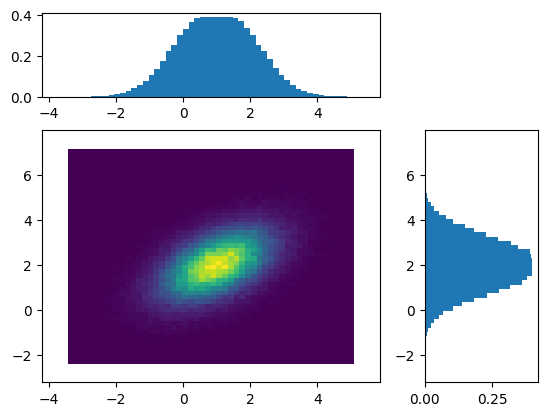

In [7]:
prob2d(cov1=0.5)

We say that random variables $X$ and $Y$ are ****<span style="color:LightGreen">independent</span>** if

$$ \Large
F(x, y) = F(x) F(y) \; ,
$$

which leads to

$$ \Large
f(x, y) = f(x) f(y)
$$

and

$$ \Large
f(x\mid y) = f(x) \quad , \quad f(y\mid x) = f(y) \; .
$$

The corresponding picture is:

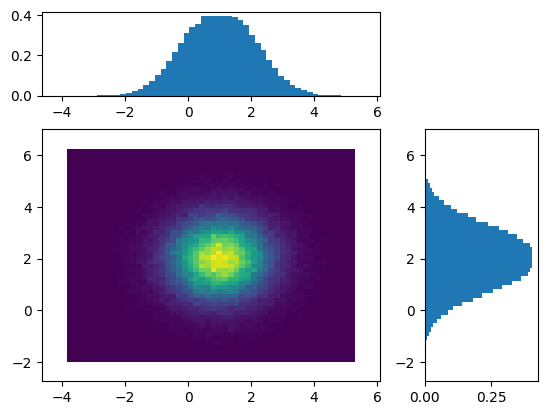

In [8]:
prob2d(cov1=0.)

## <span style="color:Orange">Practical Probability Calculus</span>

It is often useful to use probability densities that are hybrids of the fully joint / marginal / conditional cases, such as $f(x\mid y, z)$ and $f(x, y\mid z)$, but these do not require any new formalism.  In the following, we adopt a slightly more abstract notation with the following conventions:
 - $P(\ldots)$ is a generic probability (density).

 - $A_i$ and $B_j$ are generic random variables or, more generically, logical propositions about outcomes.

 - $D$ represents generic data features.

 - $\Theta$ represents generic model parameters.

 - $M$ represents generic model hyperparameters.

A practical calculus for such expressions boils down to the following transformation rules:

**<span style="color:violet">Rule-1</span>**: the order of arguments on either side of $\mid$ is not significant:

$$ \Large
P(A_1, A_2, \ldots\mid B_1, B_2\ldots) =
P(A_2, A_1, \ldots\mid B_1, B_2\ldots) =
P(A_1, A_2, \ldots\mid B_2, B_1\ldots) = \ldots
$$

**<span style="color:violet">Rule-2</span>**: use the definition of conditional probability to move a variable from the LHS to the RHS:

$$ \Large
P(A_2,\ldots\mid A_1,B_1,B_2,\ldots) = \frac{P(A_1,A_2,\ldots\mid B_1,B_2\ldots)}{P(A_1\mid B_1,B_2\ldots)} \; .
$$

**<span style="color:violet">Rule-3</span>**: use the chain rule to move a variable from the RHS to the LHS (really just a restatement of Rule-2):

$$ \Large
P(B_1,A_1,A_2,\ldots\mid B_2,\ldots) = P(A_1,A_2,\ldots\mid B_1,B_2,\ldots)\,P(B_1\mid B_2,\ldots) \; .
$$

**<span style="color:violet">Rule-4</span>**: use a marginalization integral to remove a variable from the LHS:

$$ \Large
P(A_2,\ldots\mid B_1,B_2,\ldots) = \int d A_1'\, P(A_1', A_2, \ldots\mid B_1, B_2\ldots) \; .
$$

**<span style="color:violet">Rule-5</span>**: combine Rule-3 and Rule-4 to remove a variable from the RHS:

$$ \Large
P(A_1,A_2,\ldots\mid B_2,\ldots) = \int d B_1'\, P(A_1,A_2,\ldots\mid B_1',B_2,\ldots)\,P(B_1'\mid B_2,\ldots) \; .
$$

<hr style="border:1px solid rgba(255, 255, 255, 1); margin: 2em 0;">

___<span style="color:violet">EXERCISE</span>___: Use these rules to show that:

$$ \Large
P(\Theta_M \mid D,M) = \frac{P(D\mid\Theta_M ,M)\, P(\Theta_M,M)}{P(D,M)} \; .
$$

We will use this result later when we discuss **<span style="color:LightGreen">Bayesian inference</span>**.

Apply the rules to the LHS in order to make it look more like the RHS:

$$ \Large
\begin{aligned}
P(\Theta_M \mid D,M) &= \frac{P(D,\Theta_M\mid M)}{P(D\mid M)} & \text{Rule-2} \\
&= \frac{P(D\mid\Theta_M,M)\,P(\Theta_M|M)}{P(D\mid M)} & \text{Rule-3} \\
&= \frac{P(D\mid\Theta_M,M)\left[ P(\Theta_M,M) / P(M)\right]}{\left[ P(D,M) / P(M)\right]} & \text{Rule-3} \\
&= \frac{P(D\mid\Theta_M,M)\, P(\Theta_M,M)}{P(D,M)} & \text{simplify}
\end{aligned}
$$

<hr style="border:1px solid rgba(255, 255, 255, 1); margin: 2em 0;">

## <span style="color:Orange">Acknowledgments</span>

* Initial version: Mark Neubauer
* Bayes example: Anne Sickles

© Copyright 2026